# Tutorial to run HOD models
Should work under cosmodesi 2025_03 environment 

In [1]:
from HODDIES import HOD

# Using abacus simulation at NERSC

In [2]:
# Initiate the HOD instance with default parameter file default_HOD_parameters.yaml

HOD_obj= HOD(param_file='../HODDIES/default_HOD_parameters.yaml', path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')



Set number of threads to 32


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.950 ...
Done took 00:00:25
Compute columns...
Done took  00:00:01
AbacusSummit_highbase_c000_ph100 at 0.95 loaded, took 00:00:27
Initialize Abacus c000 cosmology


## - Different ways to give input parameters

If you want to use a custom parameter file:

<div style="background-color: rgb(50, 50, 50);">

```js
HOD_obj= HOD(param_file='my_custom_param_file', path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
``` 
<div style="background-color: black;">
<br> 

You can pass a dictionnary :
<div style="background-color: rgb(50, 50, 50);">

```js
args = {'''pass any parameters with the same structure as the default yaml parameter file'''}
HOD_obj= HOD(args=args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
```
<div style="background-color: black;"> <br> 

You can also overwrite parameters if you provide **kwargs dict
<div style="background-color: rgb(50, 50, 50);">

```js
HOD_obj= HOD(args=args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus', **{'ELG': {'Ac': 1}})
or
HOD_obj= HOD(param_file='my_custom_param_file', path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus', **{'ELG': {'Ac': 1}})
```
<div style="background-color: black;">

<br> 

## - Different ways to load halo catalogs 

Catalog types supported: `np.ndarray, mpytools.Catalog, dict`

Halo catalogs must contain at least these colunms: `['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id']`

Initialize the instance with a preloaded halo_catalog:
<div style="background-color: rgb(50, 50, 50);">

```js
HOD_obj= HOD(hcat_file=halo_catalog, **{'hcat': {'boxsize': 1000}}) # Need to provide boxsize 
```

You can also pass the path of the halo catalog. Supported format are: `fits, h5, asdf`
<div style="background-color: rgb(50, 50, 50);">

```js
path_to_halo_catalog = '/path/to/halo_catalog'
HOD_obj= HOD(hcat_file=path_to_halo_catalog, **{'hcat': {'boxsize': 1000}}) # Need to provide boxsize 
```
<div style="background-color:white;">


In [3]:
# All parameters from the parameter file are set here
HOD_obj.args

{'tracers': ['LRG', 'ELG'],
 'LRG': {'Ac': 0.05,
  'As': 0.11,
  'HOD_model': 'SHOD',
  'sat_HOD_model': 'Nsat_pow_law',
  'M_0': 11.63,
  'M_1': 11.7,
  'Q': 100,
  'alpha': 0.6,
  'assembly_bias': {'c': [0, 0]},
  'conformity_bias': False,
  'density': 0.001,
  'f_sigv': 1,
  'gamma': 1,
  'log_Mcent': 11.63,
  'pmax': 1,
  'satellites': True,
  'sigma_M': 0.12,
  'vel_sat': 'rd_normal',
  'exp_frac': 0,
  'exp_scale': 1,
  'nfw_rescale': 1,
  'v_infall': 0,
  'vsmear': 0},
 'ELG': {'Ac': 0.05,
  'As': 0.11,
  'HOD_model': 'GHOD',
  'sat_HOD_model': 'Nsat_pow_law',
  'M_0': 11.63,
  'M_1': 11.7,
  'Q': 100,
  'alpha': 0.6,
  'assembly_bias': {'c': [0, 0]},
  'conformity_bias': False,
  'density': 0.001,
  'f_sigv': 1,
  'gamma': 1,
  'log_Mcent': 11.63,
  'pmax': 0.1,
  'satellites': True,
  'sigma_M': 0.12,
  'vel_sat': 'rd_normal',
  'exp_frac': 0,
  'exp_scale': 1,
  'nfw_rescale': 1,
  'v_infall': 0,
  'vsmear': None},
 'hcat': {'boxsize': None,
  'path_to_sim': None,
  'path_to_

# Using a custom halo catalog

In [5]:
# You can define different tracers 
print('Tracers considered', HOD_obj.args['tracers'])

# You can define different tracers 
print(f"HOD model for {HOD_obj.args['tracers'][0]}: {HOD_obj.args[HOD_obj.args['tracers'][0]]['HOD_model']}")
print(f"HOD model for {HOD_obj.args['tracers'][1]}: {HOD_obj.args[HOD_obj.args['tracers'][1]]['HOD_model']}")

#  All HOD model for central galaxies are define in https://arxiv.org/abs/2306.06319
print('Central HOD model available:', 'SFHOD', 'SHOD', 'GHOD', 'HMQ', 'LNHOD','mHMQ')
print('Satelitte HOD model is the standard power law')

Tracers considered ['LRG', 'ELG']
HOD model for LRG: SHOD
HOD model for ELG: GHOD
Central HOD model available: SFHOD SHOD GHOD HMQ LNHOD mHMQ
Satelitte HOD model is the standard power law


In [6]:
# HOD parameters are set in dictionnary for each tracer 
print(HOD_obj.args['LRG'])
print(HOD_obj.args['ELG'])

{'Ac': 0.05, 'As': 0.11, 'HOD_model': 'SHOD', 'sat_HOD_model': 'Nsat_pow_law', 'M_0': 11.63, 'M_1': 11.7, 'Q': 100, 'alpha': 0.6, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'density': 0.001, 'f_sigv': 1, 'gamma': 1, 'log_Mcent': 11.63, 'pmax': 1, 'satellites': True, 'sigma_M': 0.12, 'vel_sat': 'rd_normal', 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'v_infall': 0, 'vsmear': 0}
{'Ac': 0.05, 'As': 0.11, 'HOD_model': 'GHOD', 'sat_HOD_model': 'Nsat_pow_law', 'M_0': 11.63, 'M_1': 11.7, 'Q': 100, 'alpha': 0.6, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'density': 0.001, 'f_sigv': 1, 'gamma': 1, 'log_Mcent': 11.63, 'pmax': 0.1, 'satellites': True, 'sigma_M': 0.12, 'vel_sat': 'rd_normal', 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'v_infall': 0, 'vsmear': None}


In [3]:
# Create galaxy mock catalog, First evaluation is slower because it needs to compile jit functions

cats = HOD_obj.make_mock_cat(fix_seed=None) #return 1 catalogue per tracer 
cat_elg = HOD_obj.make_mock_cat(tracers='ELG') 
cats, cat_elg 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 22.52086353302002
Start satellite assignement


/global/u1/a/arocher/Code/postdoc/HOD/Dev/HODDIES/HODDIES/utils.py:499: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../HODDIES/utils.py", line 415:
@njit(fastmath=True)
def get_etavir_nfw(c): 
^

  etaVir = get_etavir_nfw(c[i])*nfw_rescale
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../HODDIES/utils.py", line 487:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, v

Satellite assignement done 16.820035457611084
LRG mock catalogue done 16.96827483177185
563072 central galaxies, 137485 satellites, fraction of satellite 0.20 
Done overall time  LRG 40.627361536026
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 28.084631204605103
Start satellite assignement
Satellite assignement done 1.679710865020752
ELG mock catalogue done 2.0251967906951904
445265 central galaxies, 553527 satellites, fraction of satellite 0.55 
Done overall time  ELG 54.29496145248413


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../HODDIES/utils.py", line 487:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


Create mock catalog for ['ELG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 1.2144052982330322
Start satellite assignement
Satellite assignement done 0.9462058544158936
ELG mock catalogue done 1.1121389865875244
444558 central galaxies, 552775 satellites, fraction of satellite 0.55 


: 

In [8]:
# By default the code automatically fix the density
print('Density fixed to ', HOD_obj.args['ELG']['density'], 'ELG catalogue size:', cat_elg.size)
print('Remove density constrain')

HOD_obj.args['ELG']['density'] = False
cat_elg_nodens = HOD_obj.make_mock_cat(tracers='ELG') 
print('ELG catalogue size without density constrain:', cat_elg_nodens.size)


Density fixed to  0.001 ELG catalogue size: 998625
Remove density constrain
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.3721122741699219
Start satellite assignement
Satellite assignement done 0.9565181732177734
ELG mock catalogue done 1.310333490371704
1013457 central galaxies, 1183059 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.3175418376922607
ELG catalogue size without density constrain: 2196516


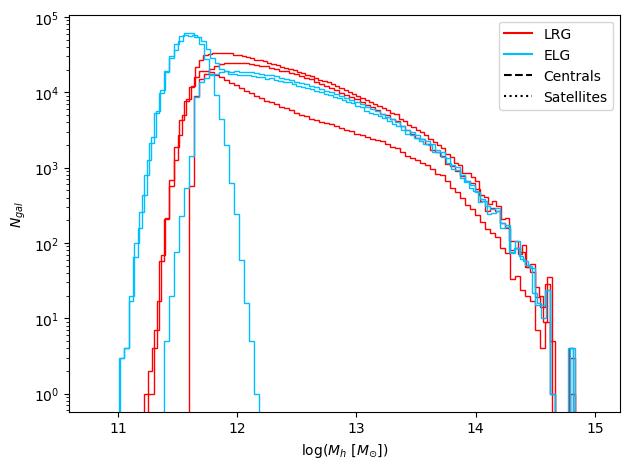

In [9]:
#Plot Halo mass function 

HOD_obj.plot_HMF(cats, show_sat=True)


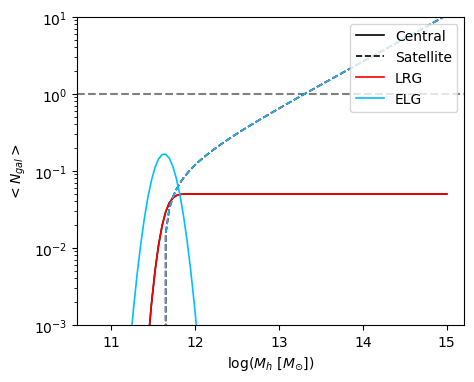

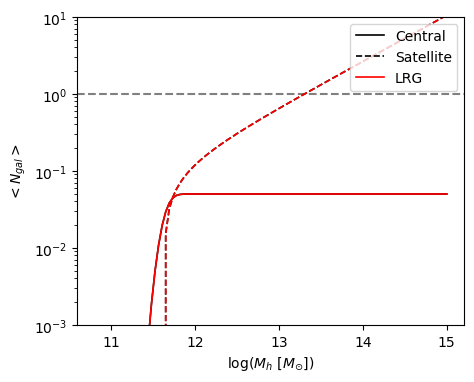

In [10]:
#Plot HOD model
HOD_obj.HOD_plot()
HOD_obj.HOD_plot(tracer='LRG')


In [11]:
# 2PCF settings 
HOD_obj.args['2PCF_settings'] # if edges_rppi/smu are None it will take the rp_min/max 

{'rsd': True,
 'bin_logscale': True,
 'mu_max': 1,
 'n_mu_bins': 101,
 'multipole_index': [0, 2],
 'n_r_bins': 25,
 'n_rp_bins': 25,
 'rmax': 30,
 'rmin': 0.01,
 'rp_max': 30,
 'rp_min': 0.01,
 'edges_rppi': None,
 'edges_smu': None,
 'los': 'z',
 'pimax': 40}

In [12]:
#compute clustering for 1 tracer, it apply rsd following the los parameter

rp, wp = HOD_obj.get_wp(cats, tracers='ELG')
s, xi = HOD_obj.get_2PCF(cats, tracers='ELG')

#Compute wp for ELG...


Done in 1.029 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 0.890 s


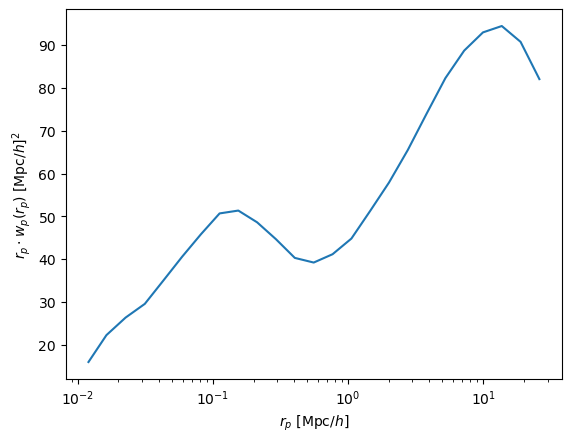

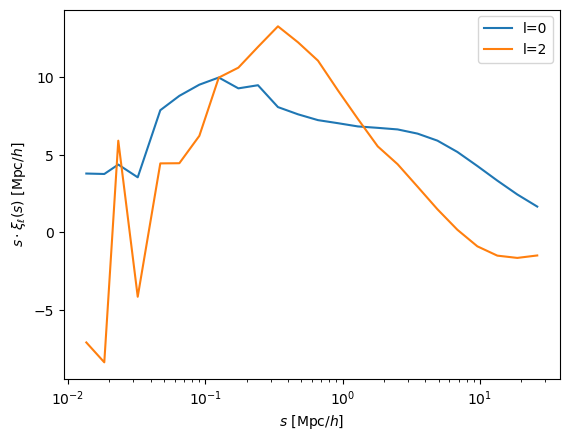

In [13]:
#Plot 2PCF 
import matplotlib.pyplot as plt

plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()


plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [14]:
# Create galaxy mock catalog with different seed
import numpy as np 
cat_elg = [HOD_obj.make_mock_cat(fix_seed=ii, tracers='ELG', verbose=False) for ii in np.random.randint(0,2**32, size=10)]


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../HODDIES/utils.py", line 488:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


#Compute wp for ELG...


Done in 0.490 s
#Compute wp for ELG...
Done in 0.493 s
#Compute wp for ELG...
Done in 0.489 s
#Compute wp for ELG...
Done in 0.494 s
#Compute wp for ELG...
Done in 0.501 s
#Compute wp for ELG...
Done in 0.507 s
#Compute wp for ELG...
Done in 0.500 s
#Compute wp for ELG...
Done in 0.486 s
#Compute wp for ELG...
Done in 0.529 s
#Compute wp for ELG...
Done in 0.481 s


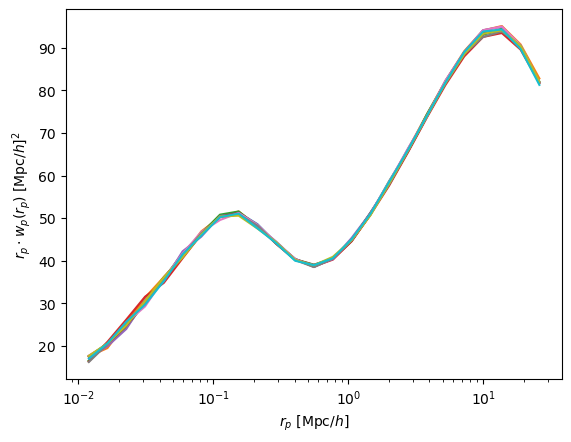

#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.245 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.383 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.351 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.411 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.448 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.396 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.422 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.487 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.400 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.400 s


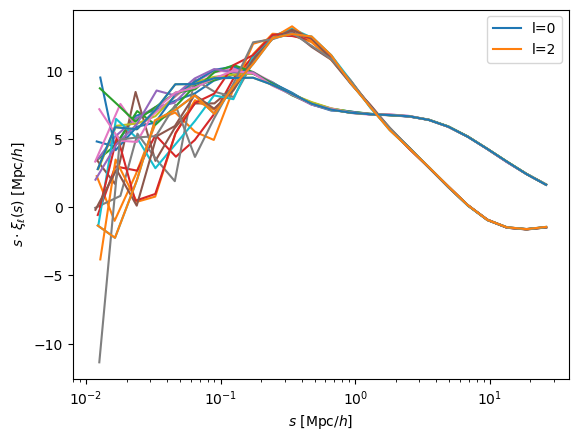

In [15]:
for cat in cat_elg:
    rp, wp = HOD_obj.get_wp(cat, tracers='ELG')
    plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()

for cat in cat_elg:
    s, xi = HOD_obj.get_2PCF(cat, tracers='ELG')
    plt.plot(s,s*xi[0])
    plt.plot(s,s*xi[1])
plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [19]:
mask = HOD_obj_part.hcat['log10_Mh'] > 11.3

In [16]:
import numpy as np
from numba import numba, njit 
@njit(parallel=True)
def get_index_part(npstart, npout, idx, Nthread=64):
    
    """
    Sample satellite galaxy positions and velocities from Abacus particle subsamples.

    Parameters
    ----------
    npout : array
        Number of available particles for each halo.
    npstart : array
        Starting index in the global particle array for each halo.
    nb_part_out : array
        Number of particles to after mass cut.
    Nthread : int
        Number of threads to use in parallel loop.


    Returns
    -------
    mask_nfw : array
        Boolean mask identifying entries with no enough particles (to be filled using NFW).
    """

    numba.set_num_threads(Nthread)
    indexes = np.zeros(idx[-1], dtype=np.int64)
    for i in numba.prange(npstart.size):
        indexes[idx[i]:idx[i+1]] = npstart[i] + np.arange(npout[i])        
    return indexes

def cut_abacus_part(hcat, pcat, mass_cut):
    mask = hcat['log10_Mh'] >= mass_cut
    idx = get_index_part(hcat['npstartA'][mask], hcat['npoutA'][mask], np.insert(np.cumsum(hcat['npoutA'][mask]),0,0)) 
    pcat = pcat[idx]

In [2]:
mask = HOD_obj_part.hcat['log10_Mh'] > 11.3
idx = cut_part(HOD_obj_part.hcat['npstartA'][mask], HOD_obj_part.hcat['npoutA'][mask], np.insert(np.cumsum(HOD_obj_part.hcat['npoutA'][mask]),0,0))

NameError: name 'cut_part' is not defined

In [18]:
cut_abacus_part(HOD_obj_part.hcat, HOD_obj_part.part_subsamples, 11.3)

IndexError: index 242602683 is out of bounds for axis 0 with size 242602683

In [11]:
HOD_obj_part.part_subsamples = HOD_obj_part.part_subsamples[idx]

In [19]:
HOD_obj_part.part_subsamples

pos,vel
float32[3],float32[3]
-499.671 .. -470.659,240.23438 .. -96.67969
-499.691 .. -470.691,140.625 .. -331.0547
-499.766 .. -470.688,79.10156 .. -76.171875
-499.729 .. -470.691,304.6875 .. -117.1875
-499.744 .. -470.68,134.76562 .. -79.10156
-499.758 .. -470.703,61.523438 .. -202.14844
-499.715 .. -470.709,169.92188 .. -128.90625
-499.681 .. -470.754,35.15625 .. -125.97656
-499.697 .. -468.001,240.23438 .. -439.45312


# Use particles for satelittes instead of NFW

In [ ]:
# Initiate the HOD instance with default parameter file parameters_HODdefaults.yaml
HOD_obj.args['use_particles'] = True
HOD_obj.args['hcat']['load_particles'] = True

HOD_obj_part= HOD(args=HOD_obj.args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')


Set number of threads to 32
Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_base_c000_ph000/halos/z1.100 ...
Done took 00:01:45
Compute columns...
Done took  00:00:05
AbacusSummit_base_c000_ph000 at 1.1 loaded, took 00:01:52
Initialize Abacus c000 cosmology


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/classy.py:77: UserWarning: Class did not read input parameter(s): flush
  return super(_ClassEngine, self).compute(tasks)


In [4]:
HOD_obj_part.hcat

Catalog(csize=384257826, size=384257826, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id'])

In [ ]:
#First run need to compile jit functions
# If not enough particles are found, automatically switch to NFW
# Need lot of memory to run with particles, so it might no work with 2Gpc/h boxes
cats = HOD_obj_part.make_mock_cat('LRG',fix_seed=None) 
cats 

Create mock catalog for ['LRG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 4.719377040863037
Start satellite assignement
Satellite assignement done 1.517977237701416
LRG mock catalogue done 2.2425780296325684
4580030 central galaxies, 1017918 satellites, fraction of satellite 0.18 
Done overall time  LRG 11.368123769760132


Catalog(csize=5597948, size=5597948, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER'])

: 

In [ ]:
#Second run is faster
cats = [HOD_obj_part.make_mock_cat(fix_seed=None) for i in range(10)]
cats 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 5.753293752670288
Start satellite assignement
Satellite assignement done 1.3496253490447998
LRG mock catalogue done 2.31282639503479
4576550 central galaxies, 1019543 satellites, fraction of satellite 0.18 
Done overall time  LRG 13.70967149734497
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 11.087424516677856
Start satellite assignement
Satellite assignement done 4.170024156570435
ELG mock catalogue done 5.354551553726196
3681138 central galaxies, 4298565 satellites, fraction of satellite 0.54 
Done overall time  ELG 27.04210114479065
Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 5.480118274688721
Start satellite assignement
Satellite assignement done 1.3149938583374023
LRG mock catalogue done 2.2408785820007324
4582132 central galaxies, 1016471 satellites, fraction of satellite 0.18 
Done overall time  LRG 13.34867644

#Compute wp for ELG...


Done in 0.480 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.441 s


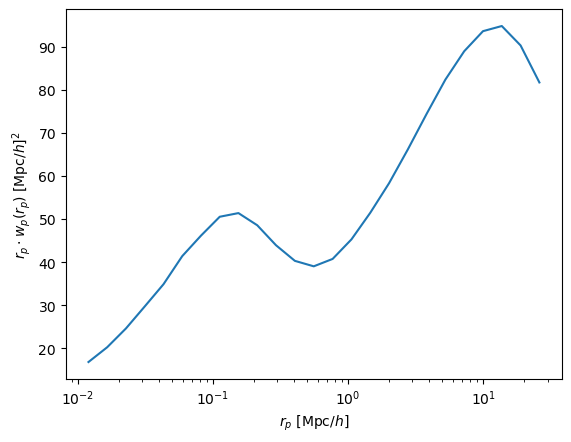

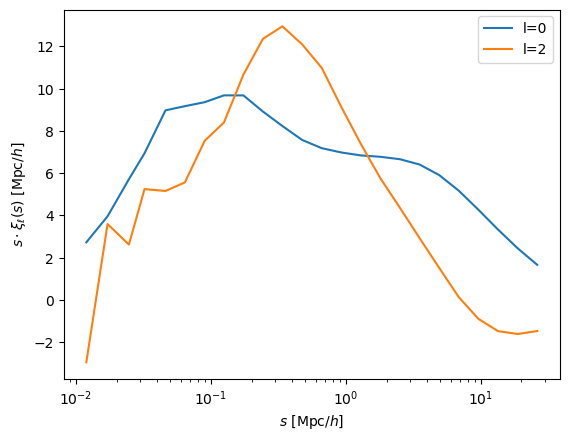

In [ ]:
#compute clustering for 1 tracer, it applies rsd following the los parameter

rp, wp = HOD_obj.get_wp(cats, tracers='ELG')
s, xi = HOD_obj.get_2PCF(cats, tracers='ELG')
#Plot 2PCF 
import matplotlib.pyplot as plt

plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()


plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [20]:
cross_corr = HOD_obj_part.get_crosswp(cats, tracers=['ELG', 'LRG'], verbose=True)

#Compute wp for ['ELG' 'ELG']...
#Done in 0.602 s
#Compute wp for ['ELG' 'LRG']...
#Done in 0.664 s
#Compute wp for ['LRG' 'LRG']...
#Done in 0.671 s


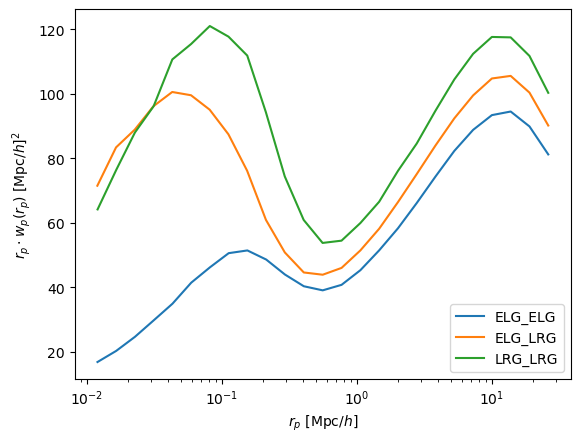

In [80]:
for tr, (rp, wp) in zip(cross_corr.keys(), cross_corr.values()):
    plt.plot(rp,rp*wp, label=tr)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()